<a href="https://colab.research.google.com/github/naadflwrx/MachineLearning/blob/main/tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv("/content/gdrive/MyDrive/Praktikum_ML/pertemuan-3/data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# melihat info data
df.info()

# variabel independen (x)
x = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

# variabel dependen (y)
y = df['cnt']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
from sklearn.model_selection import train_test_split

# split data 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

# membuat dan melatih model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# prediksi
y_pred = model.predict(x_test)

# evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 617.3930656443376
RMSE: 831.2851545662686
R2 Score: 0.8276670090367212


In [9]:
# menampilkan koefisien dan intercept
coeff_df = pd.DataFrame (model.coef_, x.columns, columns=['Coefficient'])

print(coeff_df)
print("Intercept:", model.intercept_)


            Coefficient
season       524.722536
yr          2023.997547
mnth         -38.444658
holiday     -391.550766
weekday       72.937003
workingday   160.804892
weathersit  -632.856284
temp        2097.247836
atemp       3488.042179
hum         -865.439419
windspeed  -2080.540395
Intercept: 1248.3209284778172


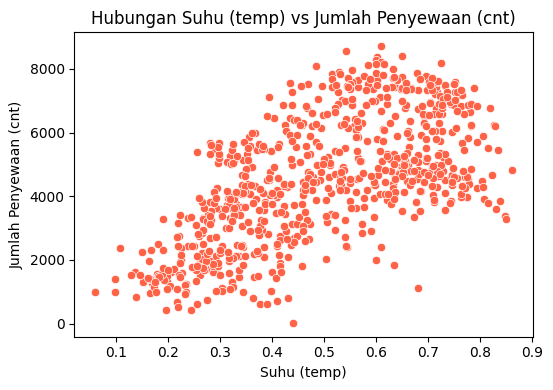

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# ukuran canvas
plt.figure(figsize=(15, 4))

# grafik: hubungan suhu dan jumlah penyewaan
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=df, color='tomato')
plt.title('Hubungan Suhu (temp) vs Jumlah Penyewaan (cnt)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')

plt.tight_layout()
plt.show()


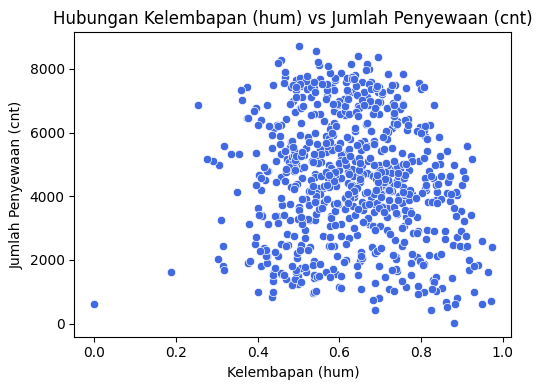

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# ukuran canvas
plt.figure(figsize=(15, 4))

# grafik hubungan kelembapan dan jumlah penyewaan
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=df, color='royalblue')
plt.title('Hubungan Kelembapan (hum) vs Jumlah Penyewaan (cnt)')
plt.xlabel('Kelembapan (hum)')
plt.ylabel('Jumlah Penyewaan (cnt)')

plt.tight_layout()
plt.show()


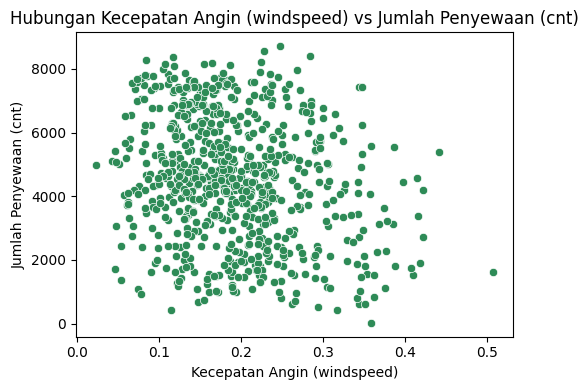

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# ukuran canvas
plt.figure(figsize=(15, 4))

# grafik hubungan kecepatan angin dan jumlah penyewaan
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=df, color='seagreen')
plt.title('Hubungan Kecepatan Angin (windspeed) vs Jumlah Penyewaan (cnt)')
plt.xlabel('Kecepatan Angin (windspeed)')
plt.ylabel('Jumlah Penyewaan (cnt)')

plt.tight_layout()
plt.show()
